In [3]:
import pygame as pg

def main():

  # 初期化処理
  pg.init() 
  pg.display.set_caption('ぼくのかんがえたさいきょうのげーむ')
  disp_w, disp_h = 800, 600
  screen = pg.display.set_mode((disp_w,disp_h)) # WindowSize
  clock  = pg.time.Clock()
  font   = pg.font.Font(None,15)
  frame  = 0
  exit_flag = False
  exit_code = '000'

  # ボールのパラメータ p:位置、v:速度、a:加速度
  ball_p = pg.Vector2(50, 90)  # x=50, y=90 (px)
  ball_v = pg.Vector2(2, 0)    # vx=2, vy=0 (px/frm)
  ball_a = pg.Vector2(0, 0.9)  # ax=0, ay=0.9 (px/frm^2)
  ball_r = 24                  # ボールの半径
  ball_c = pg.Color('#ff0000') # ボールの色

  ground_h = 48 # 地面の高さ

  # ゲームループ
  while not exit_flag:

    # システムイベントの検出
    for event in pg.event.get():
      if event.type == pg.QUIT: # ウィンドウ[X]の押下
        exit_flag = True
        exit_code = '001'

    # 背景描画
    screen.fill(pg.Color('WHITE'))

    # ボールの描画、位置・速度の更新
    pg.draw.circle(screen,ball_c,ball_p,ball_r,width=2)
    ball_p += ball_v
    ball_v += ball_a

    ## 地面との衝突処理
    if ball_p.y >= disp_h - ground_h - ball_r :
      ball_p.y = disp_h - ground_h - ball_r
      ball_v.y = - 0.8 * ( ball_v.y - ball_a.y )

    ## 右端と左端との衝突処理
    if ball_p.x + ball_r > disp_w :
      ball_p.x = disp_w - ball_r
      ball_v.x = -0.8 * ball_v.x 
    elif ball_p.x - ball_r < 0:
      ball_p.x = ball_r
      ball_v.x = -0.8 * ball_v.x 

    # 地面描画 rectの 第3引数は (左上X, 左上Y ,幅 ,高さ)
    pg.draw.rect(screen, pg.Color('#864A2B'),
                (0, disp_h-ground_h, disp_w, disp_h))

    # フレームカウンタの描画
    frame += 1
    frm_str = f'{frame:05}'
    screen.blit(font.render(frm_str,True,'BLACK'),(10,10))

    # 画面の更新と同期
    pg.display.update()
    clock.tick(30)

  # ゲームループ [ここまで]
  pg.quit()
  return exit_code

if __name__ == "__main__":
  code = main()
  print(f'プログラムを「コード{code}」で終了しました。')

プログラムを「コード001」で終了しました。


In [9]:
%reset -f
import os
import requests

# フォルダが存在しなければ作成
dir = 'data/download/'
if not os.path.isdir(dir):
  os.makedirs(dir)

fn = 'bird.png'
url = 'http://dispell.net/etc/v4_bird1.png'
res = requests.get(url)

if res.status_code != 200:
  raise Exception(f'ファイル {url} の取得に失敗。強制終了します。Code:{res.status_code}')
else :
  with open(f'{dir}/{fn}','wb') as file: 
    file.write(res.content)
  print(f'{dir} に {fn} を保存しました')

data/download/ に bird.png を保存しました


横 72 px , 縦 128 px


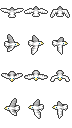

In [1]:
%reset -f
import cv2
from IPython.display import Image

path = 'data/download/' + 'bird.png'
img = cv2.imread(path)
height, width, _ = img.shape  # アンパック
print(f'横 {width} px , 縦 {height} px')
Image(open(path,'rb').read())

鳥は24×32の大きさの画像

In [1]:
# 関数の定義と引数の利用
def greet(name):
    print("Hello, " + name + "!")

# 関数の呼び出しと引数の渡し方
greet("Alice")  
greet("Bob")   

Hello, Alice!
Hello, Bob!
